In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten

In [11]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


In [12]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [13]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




94765736/94765736 [==============================] - 84s 1us/step


In [14]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [15]:
 # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [16]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [17]:
prediction = Dense(len(folders), activation='softmax')(x)


In [18]:
# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [19]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [20]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [21]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [22]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3352 images belonging to 7 classes.


In [23]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 813 images belonging to 7 classes.


In [24]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\niraj\AppData\Local\Temp\ipykernel_812\4102162479.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50


105/105 [==============================] - 510s 5s/step - loss: 3.8659 - accuracy: 0.2545 - val_loss: 1.5951 - val_accuracy: 0.3936
Epoch 2/50
105/105 [==============================] - 457s 4s/step - loss: 1.8892 - accuracy: 0.3714 - val_loss: 1.9983 - val_accuracy: 0.4367
Epoch 3/50
105/105 [==============================] - 454s 4s/step - loss: 1.8584 - accuracy: 0.3956 - val_loss: 2.2528 - val_accuracy: 0.3518
Epoch 4/50
105/105 [==============================] - 457s 4s/step - loss: 1.8728 - accuracy: 0.4236 - val_loss: 2.0823 - val_accuracy: 0.4280
Epoch 5/50
105/105 [==============================] - 455s 4s/step - loss: 1.7259 - accuracy: 0.4612 - val_loss: 2.9063 - val_accuracy: 0.3567
Epoch 6/50
105/105 [==============================] - 455s 4s/step - loss: 1.7898 - accuracy: 0.4460 - val_loss: 2.1291 - val_accuracy: 0.3715
Epoch 7/50
105/105 [==============================] - 451s 4s/step - loss: 1.6718 - accuracy: 0.4723 - val_loss: 1.3296 - val_accuracy: 0.54

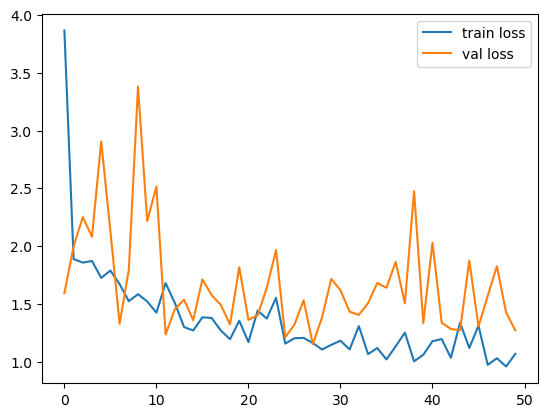

<Figure size 640x480 with 0 Axes>

In [25]:
#plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

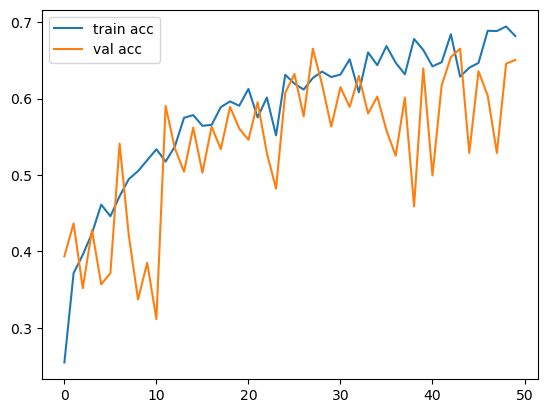

<Figure size 640x480 with 0 Axes>

In [26]:
#plot the accuracy

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [27]:
# save it as a h5 file

from tensorflow.keras.models import load_model
model.save('model_resnt50.h5')

C:\Users\niraj\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
y_pred=model.predict(test_set)

26/26 [==============================] - 159s 5s/step


In [29]:
y_pred

array([[5.86323619e-01, 1.96754772e-04, 8.15100793e-05, ...,
        6.07743151e-02, 1.34700060e-01, 1.70218386e-03],
       [1.09112255e-01, 2.90176336e-04, 1.12169906e-01, ...,
        3.42328623e-02, 6.83351994e-01, 3.33798341e-02],
       [2.96664331e-02, 1.66904494e-01, 1.03226921e-04, ...,
        7.17980191e-02, 1.41377673e-01, 5.76898158e-01],
       ...,
       [2.82562733e-01, 4.47862893e-01, 2.72762845e-04, ...,
        1.15225345e-01, 1.07669920e-01, 1.04853623e-02],
       [1.26896173e-01, 4.60923562e-04, 2.11871858e-03, ...,
        6.08343445e-03, 3.85522307e-03, 8.73705186e-03],
       [4.58707251e-02, 3.21248313e-03, 1.11389346e-02, ...,
        1.01481006e-01, 1.41300056e-02, 2.19763778e-02]], dtype=float32)

In [33]:
from keras.preprocessing import image

img=image.load_img('Datasets/test/Audi/1000.jpg', target_size=(224, 224))

In [34]:
x=image.img_to_array(img)

In [35]:
x

array([[[ 15.,  21.,  37.],
        [ 15.,  21.,  37.],
        [ 15.,  21.,  37.],
        ...,
        [ 11.,  17.,  33.],
        [ 11.,  17.,  33.],
        [ 11.,  17.,  33.]],

       [[ 15.,  21.,  37.],
        [ 15.,  21.,  37.],
        [ 15.,  21.,  37.],
        ...,
        [ 11.,  17.,  33.],
        [ 11.,  17.,  33.],
        [ 11.,  17.,  33.]],

       [[ 16.,  22.,  38.],
        [ 16.,  22.,  38.],
        [ 16.,  22.,  38.],
        ...,
        [ 11.,  17.,  33.],
        [ 11.,  17.,  33.],
        [ 11.,  17.,  33.]],

       ...,

       [[ 94., 101., 109.],
        [ 93., 100., 108.],
        [ 96., 103., 111.],
        ...,
        [ 69.,  76.,  86.],
        [ 68.,  75.,  85.],
        [ 68.,  75.,  85.]],

       [[ 86.,  93., 101.],
        [ 91.,  98., 106.],
        [ 93., 100., 108.],
        ...,
        [ 67.,  74.,  84.],
        [ 68.,  75.,  85.],
        [ 69.,  76.,  86.]],

       [[ 77.,  84.,  92.],
        [ 71.,  78.,  86.],
        [ 77.,  

In [36]:
x.shape

(224, 224, 3)

In [37]:
x=x/255

In [38]:
x=np.expand_dims(x, axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [39]:
model.predict(img_data)

1/1 [==============================] - 30s 30s/step


array([[5.5826997e-15, 2.4280884e-13, 9.9875641e-01, 1.6073428e-22,
        1.1569669e-13, 1.0962943e-03, 1.4728600e-04]], dtype=float32)

In [40]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 433ms/step


In [42]:
a==2

array([ True])